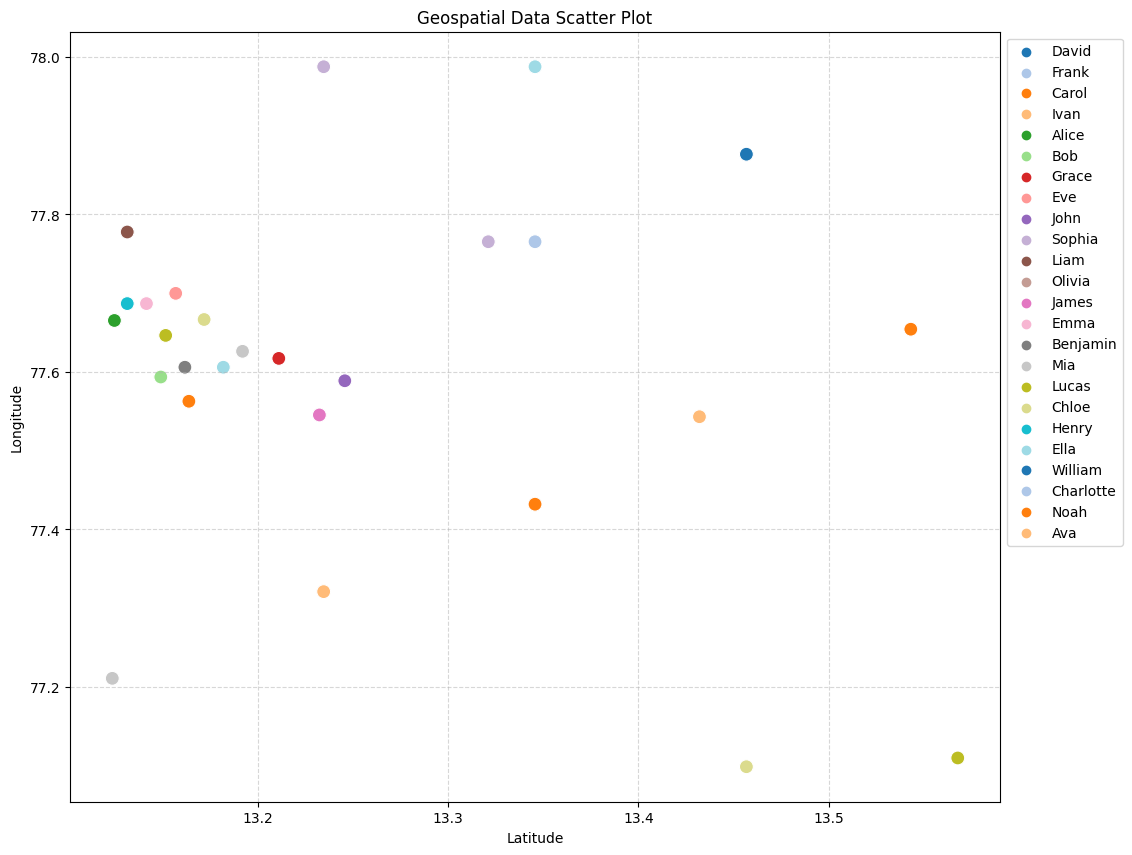

DBSCAN Silhouette Score: 0.51


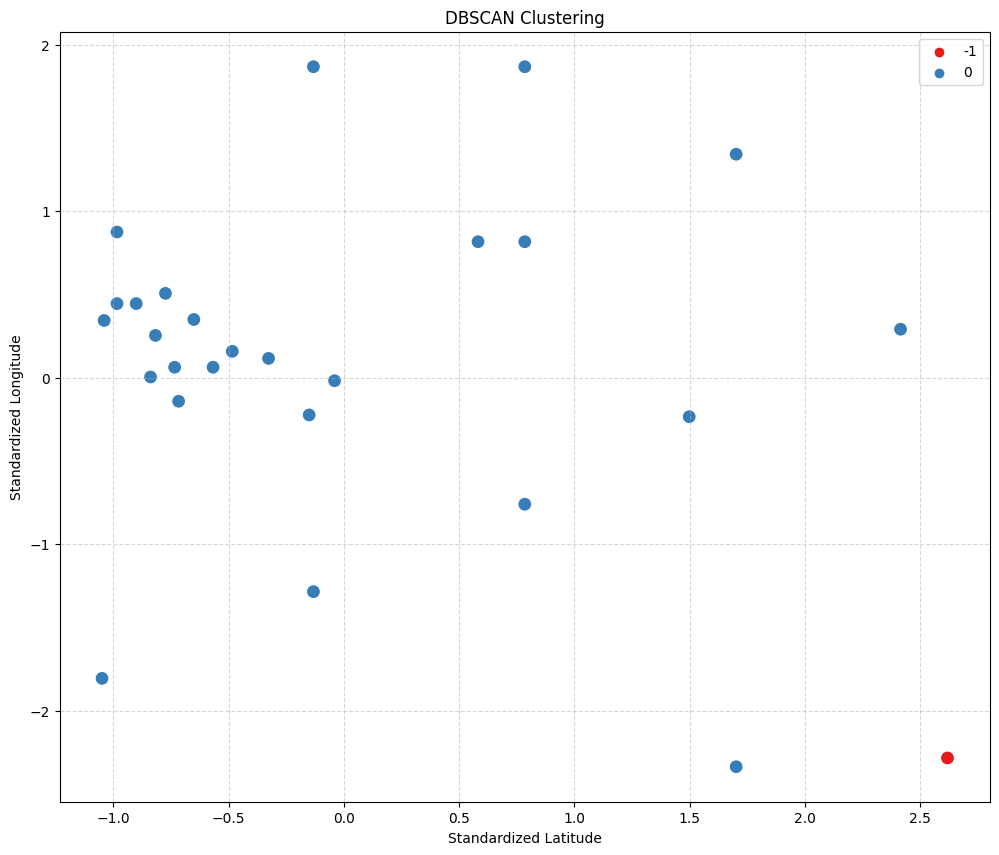

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Silhouette Score: 0.53


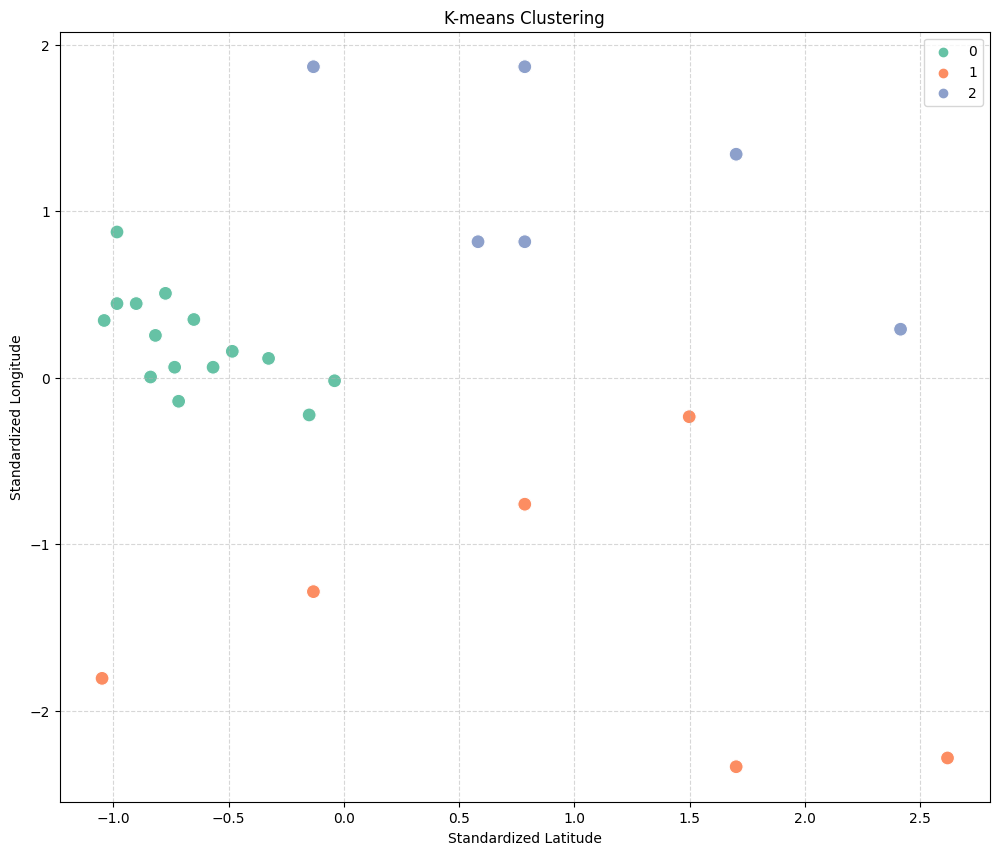


Menu:
1. Find who a person might have infected
2. Exit


Enter your choice (1/2):  1
Enter a name to find who is potentially infected by them:  Henry


No individuals are potentially infected by Henry.

Menu:
1. Find who a person might have infected
2. Exit


Enter your choice (1/2):  1
Enter a name to find who is potentially infected by them:  David


David is potentially infected the following individuals: Frank, Ivan, Bob

Menu:
1. Find who a person might have infected
2. Exit


Enter your choice (1/2):  1
Enter a name to find who is potentially infected by them:  Olivia


Olivia is potentially infected the following individuals: James

Menu:
1. Find who a person might have infected
2. Exit


Enter your choice (1/2):  1
Enter a name to find who is potentially infected by them:  Liam


Liam is potentially infected the following individuals: Sophia

Menu:
1. Find who a person might have infected
2. Exit


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from geopy.distance import great_circle

# Complete dataset with 40 entries
data = [
    {
        "id": "David",
        "latitude": 13.1489531,
        "longitude": 77.593651
    },
    {
        "id": "Frank",
        "latitude": 13.1489531,
        "longitude": 77.593651
    },
    {
        "id": "Carol",
        "latitude": 13.1637157,
        "longitude": 77.5628422
    },
    {
        "id": "Ivan",
        "latitude": 13.1489531,
        "longitude": 77.593651
    },
    {
        "id": "Alice",
        "latitude": 13.1245678,
        "longitude": 77.6654321
    },
    {
        "id": "Bob",
        "latitude": 13.1489531,
        "longitude": 77.593651
    },
    {
        "id": "Grace",
        "latitude": 13.2109876,
        "longitude": 77.6172839
    },
    {
        "id": "Eve",
        "latitude": 13.1567890,
        "longitude": 77.6998765
    },
    {
        "id": "John",
        "latitude": 13.2456789,
        "longitude": 77.5888777
    },
    {
        "id": "Sophia",
        "latitude": 13.1313131,
        "longitude": 77.7777777
    },
    {
        "id": "Liam",
       "latitude": 13.1313131,
        "longitude": 77.7777777
    },
    {
        "id": "Olivia",
        "latitude": 13.2323232,
        "longitude": 77.5454545
    },
    {
        "id": "James",
        "latitude": 13.2323232,
        "longitude": 77.5454545
    },
    {
        "id": "Emma",
        "latitude": 13.1414141,
        "longitude": 77.6868686
    },
    {
        "id": "Benjamin",
        "latitude": 13.1616161,
        "longitude": 77.6060606
    },
    {
        "id": "Mia",
        "latitude": 13.1919191,
        "longitude": 77.6262626
    },
    {
        "id": "Lucas",
        "latitude": 13.1515151,
        "longitude": 77.6464646
    },
    {
        "id": "Chloe",
        "latitude": 13.1717171,
        "longitude": 77.6666666
    },
    {
        "id": "Henry",
        "latitude": 13.1313131,
        "longitude": 77.6868686
    },
    {
        "id": "Ella",
        "latitude": 13.1818181,
        "longitude": 77.6060606
    },
    {
        "id": "Sophia",
        "latitude": 13.2345678,
        "longitude": 77.9876543
    },
    {
        "id": "William",
        "latitude": 13.4567890,
        "longitude": 77.8765432
    },
    {
        "id": "Charlotte",
        "latitude": 13.3456789,
        "longitude": 77.7654321
    },
    {
        "id": "Noah",
        "latitude": 13.5432109,
        "longitude": 77.6543210
    },
    {
        "id": "Ava",
        "latitude": 13.4321098,
        "longitude": 77.5432109
    },
    {
        "id": "Liam",
        "latitude": 13.3456789,
        "longitude": 77.4321098
    },
    {
        "id": "Olivia",
        "latitude": 13.2345678,
        "longitude": 77.3210987
    },
    {
        "id": "Mia",
        "latitude": 13.1234567,
        "longitude": 77.2109876
    },
    {
        "id": "Lucas",
        "latitude": 13.5678901,
        "longitude": 77.1098765
    },
    {
        "id": "Chloe",
        "latitude": 13.4567890,
        "longitude": 77.0987654
    },
    {
        "id": "Henry",
        "latitude": 13.3456789,
        "longitude": 77.9876543
    },
    {
        "id": "Ella",
         "latitude": 13.3456789,
        "longitude": 77.9876543
    },
    {
        "id": "Sophia",
        "latitude": 13.3210987,
        "longitude": 77.7654321
    },
    {
        "id": "William",
         "latitude": 13.3456789,
        "longitude": 77.4321098
    },
    {
        "id": "Charlotte",
         "latitude": 13.2345678,
        "longitude": 77.3210987
    },
    {
        "id": "Noah",
        "latitude": 13.3456789,
        "longitude": 77.4321098
    },
    {
        "id": "Ava",
        "latitude": 13.2345678,
        "longitude": 77.3210987
    },
]

# Create a DataFrame
df = pd.DataFrame(data)

# Create a scatter plot
plt.figure(figsize=(12, 10))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id', s=100, palette='tab20')
plt.legend(bbox_to_anchor=[1, 1])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geospatial Data Scatter Plot')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Standardize the latitude and longitude columns for clustering
scaler = StandardScaler()
df[['latitude', 'longitude']] = scaler.fit_transform(df[['latitude', 'longitude']])

# Adjust DBSCAN parameters (eps and min_samples)
eps = 2  # Adjust this value based on your data
min_samples = 6  # Adjust this value based on your data

# Perform DBSCAN Clustering with adjusted parameters
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df['dbscan_cluster'] = dbscan.fit_predict(df[['latitude', 'longitude']])

# Check if there is more than one unique cluster label for DBSCAN
unique_labels_db = np.unique(df['dbscan_cluster'])
if len(unique_labels_db) > 1:
    # Evaluate DBSCAN clustering using silhouette score
    silhouette_avg_db = silhouette_score(df[['latitude', 'longitude']], df['dbscan_cluster'])
    print(f"DBSCAN Silhouette Score: {silhouette_avg_db:.2f}")
else:
    print("DBSCAN resulted in a single cluster (possibly noise). Adjust parameters.")
# Plot DBSCAN Clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='dbscan_cluster', palette='Set1', s=100)
plt.legend(bbox_to_anchor=[1, 1])
plt.xlabel('Standardized Latitude')
plt.ylabel('Standardized Longitude')
plt.title('DBSCAN Clustering')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

    
# Perform K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df['kmeans_cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])

# Evaluate K-means clustering using silhouette score
silhouette_avg_kmeans = silhouette_score(df[['latitude', 'longitude']], df['kmeans_cluster'])
print(f"K-means Silhouette Score: {silhouette_avg_kmeans:.2f}")

# Plot K-means Clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='kmeans_cluster', palette='Set2', s=100)
plt.legend(bbox_to_anchor=[1, 1])
plt.xlabel('Standardized Latitude')
plt.ylabel('Standardized Longitude')
plt.title('K-means Clustering')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Function to find individuals infected by a specific person
def find_infected_by(name, threshold_km):
    person = df[df['id'] == name]
    infected_by = []

    if not person.empty:
        person_coords = (person['latitude'].values[0], person['longitude'].values[0])

        for _, row in df.iterrows():
            coords = (row['latitude'], row['longitude'])
            distance_km = great_circle(person_coords, coords).kilometers

            if distance_km <= threshold_km and row['id'] != name:
                infected_by.append(row['id'])

    return infected_by

# Function to handle user choice
def select_person_choice(choice):
    if choice == '1':
        user_input = input("Enter a name to find who is potentially infected by them: ")
        threshold_distance_km = 1  # Adjust the threshold as needed
        infected_people = find_infected_by(user_input, threshold_distance_km)

        if infected_people:
            print(f"{user_input} is potentially infected the following individuals: {', '.join(infected_people)}")
        else:
            print(f"No individuals are potentially infected by {user_input}.")
    elif choice == '2':
        print("Exiting the program.")
        exit()
    else:
        print("Invalid choice. Please select 1 or 2.")

# Main program loop
while True:
    print("\nMenu:")
    print("1. Find who a person might have infected")
    print("2. Exit")
    user_choice = input("Enter your choice (1/2): ")
    select_person_choice(user_choice)
